# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
from math import sqrt

In [59]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [60]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [61]:
sum(data[data.race=='b'].call)

157.0

In [62]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [63]:
len(data[data.race=='b'])

2435

In [64]:
len(data)

4870






**Q1. What test is appropriate for this problem? Does CLT apply?**

To apply CLT, certain conditions must be met. 
    
    1) The samples must be independent - Identical résumés were randomly assigned, so samples are independent. 
    2) The sample size must not be bigger than 10% of the entire population - sample size is 4870. so it is not bigger than 10 % of the entire population 
    
The independent two-pair t-test is appropriate for the problem.


**Q2. What are the null and alternate hypotheses?**

    Null hypotheses : Call ratio with white sounding name = Call ratio with black sounding name  
    Alternate hypotheses : Call ratio with white sounding name > Call ratio with black sounding name



In [65]:
w = data[data.race=='w']
b = data[data.race=='b']

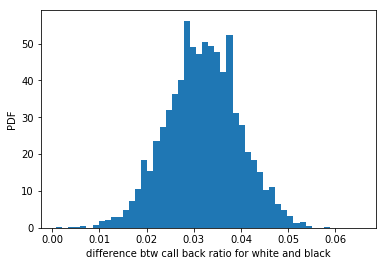

In [66]:
# Q3 Compute margin of error, confidence interval, and p-value. 
#Try using both the bootstrapping and the frequentist statistical approaches.

w = data[data.race=='w']
b = data[data.race=='b']

# Callback ratio with white sounding name
rate_w = sum(w.call)/ len(w) 

# Callback ratio with black sounding name
rate_b = sum(b.call)/ len(b)

      
    
## BOOSTRAPPING APPROACH

def draw_bs_reps(data, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = sum(np.random.choice(data, size=len(data)))/len(data)

    return bs_replicates        
        
# Draw 10,000 permutation replicates for both white sounding name and blakc sounding name
rep_ratio_w = draw_bs_reps(w.call, 10000)
rep_ratio_b = draw_bs_reps(b.call, 10000) 


# Compute difference of callback ratio from sample
emp_diff = rate_w - rate_b

# Compute difference of callback ratio from replicates
rep_diff = rep_ratio_w - rep_ratio_b

_ = plt.hist(rep_diff, bins=50, normed=True)
_ = plt.xlabel('difference btw call back ratio for white and black')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [67]:
# Compute confidence interval
conf_int_boostrap = np.percentile(rep_diff, [2.5, 97.5])

# Compute p-value

p_boostrap = np.sum(rep_diff >= emp_diff) / 10000

# Print the confidence interval and p-value for BOOSTRAPPING

print('p-value: ', p_boostrap)
print('Margin of Error: ', (conf_int_boostrap[1]- conf_int_boostrap[0])/2)
print('Confidence interval:' ,conf_int_boostrap)


p-value:  0.5059
Margin of Error:  0.015195071868583168
Confidence interval: [0.01683778 0.04722793]


In [68]:
# FREQUENTIST STATISTICAL APPROACH


# Compute p-value for FREQUENTIST
p_freq = stats.ttest_ind(w.call , b.call, equal_var = False).pvalue * 2


# Calculate Margin of Error and  95% confidence interval
N1 = len(w.call)
N2 = len(b.call)

# degree of freedom
df = (N1 + N2 - 2)

std1 = w.call.std()
std2 = b.call.std()

std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

emp_diff = rate_w - rate_b

MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

conf_int_freq = (emp_diff  - MoE, emp_diff  + MoE)


In [69]:
print('p-value: ', p_freq)
print('Margin of Error: ', MoE)
print('confidence interval: ', conf_int_freq)

p-value:  7.88588302729187e-05
Margin of Error:  0.015261931850025749
confidence interval:  (0.016770922359419835, 0.047294786059471336)


**Q4. Write a story describing the statistical significance in the context or the original problem.**

95% of time, difference between callback rate for white sounding name and black sounding name is (0.0172, 0.0472) for boostrapping approach and  (0.0168, 0.0473) for frequentist statistical approach . Therere we can say that race has an impact on callbacks  

**Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?**

No, we have to consider other variables as weel to see their impacts on impact. 